# Penn State STAT501 - Applied Regression Models (Multiple Linear Regression)

![](https://www.engr.psu.edu/ae/thesis/portfolios/2014/gvl5037/penn%20state%20logo.png)

source: [Penn State Statistics 501](https://newonlinecourses.science.psu.edu/stat501/node/251/)

In [1]:
import pandas as pd
import numpy as np

# import plotting libraries

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('seaborn-white')

# Statistical Packages
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

## IQ and Physical Characteristics

#### Are a person's brain size and body size predictive of his or her intelligence?

![](https://newonlinecourses.science.psu.edu/stat501/sites/onlinecourses.science.psu.edu.stat501/files/08multiple/MRI_brain/index.jpg)

Since the topic is MLR we can see that the model will have more than on predictor:

- Response (y): Performance IQ scores (PIQ) from the revised Wechsler Adult Intelligence Scale. This variable served as the investigator's measure of the individual's intelligence.
- Potential predictor (x1): Brain size based on the count obtained from MRI scans (given as count/10,000). 
- Potential predictor (x2): Height in inches.
- Potential predictor (x3): Weight in pounds.

In [2]:
iqsize = pd.read_table("https://newonlinecourses.science.psu.edu/stat501/sites/onlinecourses.science.psu.edu.stat501/files/data/iqsize/index.txt")
iqsize.head()

,PIQ,Brain,Height,Weight
0,124,81.69,64.5,118
1,150,103.84,73.3,143
2,128,96.54,68.8,172
3,134,95.15,65.0,147
4,110,92.88,69.0,146


A common way of investigating the relationships among all of the variables is by way of a __"scatter plot matrix."__. Here's what one version of a scatter plot matrix looks like for our brain and body size example:  

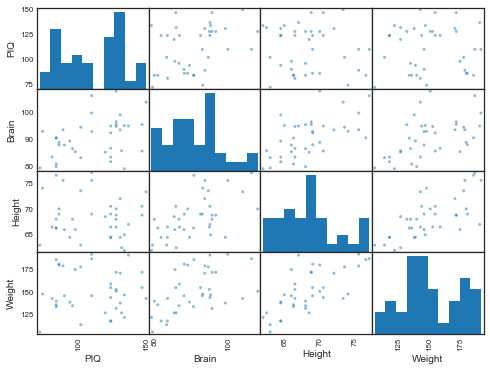

In [3]:
pd.plotting.scatter_matrix(iqsize, figsize=(8,6))
plt.show()

For each scatter plot in the matrix, the variable on the y-axis appears at and the variable on the x-axis appears at the bottom of the plot's column.

__So what does a scatter matrix plot tell us?__
1. ___Are there any egregiously erroneous data errors?__
2. __Marginal Relationships__ - scatter plot also illustrates __marginal relathionships__ between each pair of variables _without regard to the other variables_ _(e.g., brain size is the best single predictor of PIQ, but no of the other are particualy strong)_

__In multiple linear regression, the challenge is to see how the response y relates to all three predictors simultaneously.__

### Formulating a model
Start regression analysis by formulating a model. For this case we can formulate a model with __3 quantitative predictors__ for our brain and body example:

$$y_i=(\beta_0+\beta_1x_{i1}+\beta_2x_{i2}+\beta_3x_{i3})+\epsilon_i$$

where:
- yi is the intelligence (PIQ) of student i
- xi1 is the brain size (MRI) of student i
- xi2 is the height (Height) of student i
- xi3 is the weight (Weight) of student i

### Research Questions:


- Which, if any, predictors — brain size, height, or weight — explain some of the variation in intelligence scores? (Conduct hypothesis tests for individually testing whether each slope parameter could be 0.)


- What is the effect of brain size on PIQ, after taking into account height and weight? (Calculate and interpret a confidence interval for the brain size slope parameter.)


- What is the PIQ of an individual with a given brain size, height, and weight? (Calculate and interpret a prediction interval for the response.)

### Regression Modeling
In order to fit a multiple linear regression model using least quares, we use `smf.ols()` to fit the linear model with the syntax as y ~ x1 + x2 + x3) is used to fit a model with __three predictors__.

Below is the regression output to estimate the multiple regression model we formulated above.

In [4]:
iqsize_model = smf.ols(formula='PIQ ~ Brain + Height + Weight', 
                       data = iqsize).fit()

print(iqsize_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    PIQ   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     4.741
Date:                Mon, 11 Feb 2019   Prob (F-statistic):            0.00722
Time:                        04:26:58   Log-Likelihood:                -165.25
No. Observations:                  38   AIC:                             338.5
Df Residuals:                      34   BIC:                             345.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    111.3536     62.971      1.768      0.0

#### Interpretation of Regression Analysis: PIQ vs Brain, Height, Weight
Above is the MLR regersion model output.

- __R-squared = 29.49%__ tell us that 29.49% of the variation in intelligence, as quantified by `PIQ` is reduced by taking into account brain size, height and weight. 


- __R-Squared Adjusted = 23.27%__ When considering different multiple linear regression models for PIQ, we could use this value to help compare the models.

> Which, if any, predictors — brain size, height, or weight — explain some of the variation in intelligence scores? (Conduct hypothesis tests for individually testing whether each slope parameter could be 0.)

From the output above, it appears that slope parameters `Brain` and `Height` are significantly different from 0 when performing the t-test, while `Weight` is not. Therefore, have evidence to suggest (alpha = 0.05) to explain the variation in intelligence scores. `Brain` more so than `Height`. 


> What is the effect of brain size on PIQ, after taking into account height and weight? (Calculate and interpret a confidence interval for the brain size slope parameter.)

After taking into account the `height` and `weight`, in which they remain constant, we are 95% confidence the effect of brain size on PIQ is between 0.919 and 3.205. 


> What is the PIQ of an individual with a given brain size, height, and weight? (Calculate and interpret a prediction interval for the response.)

We are 95% confidence 

__Pairwise Step__

In [138]:
# https://planspace.org/20150423-forward_selection_with_statsmodels/
def forward_selected(data, response):
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    return model

In [140]:
iqmodel_ = forward_selected(iqsize, 'PIQ')
print(iqmodel_.summary())

                            OLS Regression Results                            
Dep. Variable:                    PIQ   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     7.321
Date:                Mon, 11 Feb 2019   Prob (F-statistic):            0.00221
Time:                        19:00:23   Log-Likelihood:                -165.25
No. Observations:                  38   AIC:                             336.5
Df Residuals:                      35   BIC:                             341.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    111.2757     55.867      1.992      0.0

Below is the __ANOVA Adjusted/Type III Sum of Squares Model__ that represent the reductions in error sum of squares for each term relative to a model that contains all of the remaining terms. 

In [5]:
anova_ = sm.stats.anova_lm(iqsize_model, typ=3)
print(anova_)

                 sum_sq    df          F    PR(>F)
Intercept   1225.209449   1.0   3.126987  0.085979
Brain       5239.230101   1.0  13.371595  0.000856
Height      1934.712697   1.0   4.937786  0.033034
Weight         0.003163   1.0   0.000008  0.997750
Residual   13321.808196  34.0        NaN       NaN


The P-value for the analysis of variance F-test (P = 0.007) suggests that the model containing Brain, Height and Weight is more useful in predicting intelligence than not taking into account the three predictors.

### 7. Confidence Interval for the Mean Reponse 

We define the standard error of the fit at Xh given by:
$$\textrm{se}(\hat{y}_{h})=\sqrt{\textrm{MSE}(\textbf{X}_{h}^{\textrm{T}}(\textbf{X}^{\textrm{T}}\textbf{X})^{-1}\textbf{X}_{h})}.$$

and the confidence interval is: 
$$\hat{y}_h \pm t_{(\alpha/2, n-p)} \times \textrm{se}(\hat{y}_{h})$$

__we've fit a model with PIQ as the response and Brain and Height as the predictors and also reports the values for Xh (brain size = 90 and height = 70) for which we requested the confidence interval for µY.__

In [6]:
iqsize_model = smf.ols(formula='PIQ ~ Brain + Height', 
                       data = iqsize).fit()
iqsize_model.get_prediction(pd.DataFrame({'Brain':[90], 'Height':[70]})).summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,105.639128,3.646064,98.237225,113.041031,65.346883,145.931373


#### Interpretation
- We can be __95% confident that the average performance IQ score for all college students with bran size = 90 and height = 70 is between 98.24 and 113.04 counts per 10,000.__

- $\hat{y}_h$ is the __predicted value or fit = 105.64__

- stnadard error of the fit = 3.65

### 7.2 Prediction Interval for a New Response

notation:
$$\hat{y}_h \pm t_{(\alpha/2, n-p)} \times \sqrt{MSE + [\textrm{se}(\hat{y}_{h})]^2}$$


In [7]:
iqsize_model.get_prediction(pd.DataFrame({'Brain':[90], 'Height':[70]})).summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,105.639128,3.646064,98.237225,113.041031,65.346883,145.931373


__The output reports 95% prediction interval for an indivisual college student with brain size = 90 and height = 70. We can be 95% confident that the performance IQ score of an indivisual college student with a brain size = 90 and height = 70 will be between 65.35 and 145.93 counts per 10,000__

### Assessing the model Assumption (IQ)

__below is a residual plot with the residuals, $e_i$, on the verical axis and the `fitted values`, $\hat{y}_i$ on the horizontal axis.__

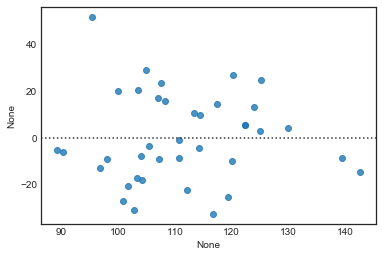

In [8]:
sns.residplot(x = iqsize_model.fittedvalues, y = iqsize_model.resid)

#### Interpretation
- average of the residuals remains pprocimately 0
- the variation of the residual appear to be roughly constant
- not excessive outlyign points (except perbas the observation about 50 that may warrant some further investigation..maybe)
- there is no strong nonlinear trend in this plot that might suggest a transformation 


we'll consider is a scatterplot with the residuals, $e_i$, on the vertical axis and one of the predictors in the model, Brain, on the horizontal axis:

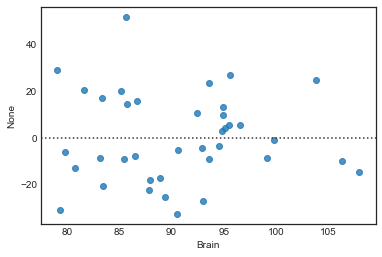

In [9]:
sns.residplot(x = iqsize.Brain, y = iqsize_model.resid)

- Thee average of the residuals remains approximately 0,
- The variation of the residuals appears to be roughly constant, and 
- there are no excessively outlying points
- there is no strong nonlinear trend in this plot that might suggest a transformation of PIQ or Brain in this model.

we'll consider is a scatterplot with the residuals, $e_i$, on the vertical axis and one of the predictors in the model, `Height`, on the horizontal axis:

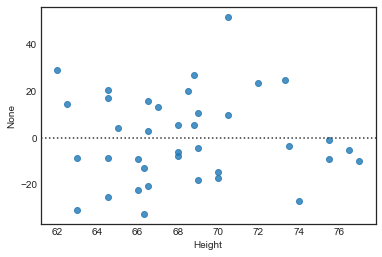

In [10]:
sns.residplot(x = iqsize.Height, y = iqsize_model.resid)

- Thee average of the residuals remains approximately 0,
- The variation of the residuals appears to be roughly constant, and 
- there are no excessively outlying points
- there is no strong nonlinear trend in this plot that might suggest a transformation of PIQ or Brain in this model.


__Normal probability plot__

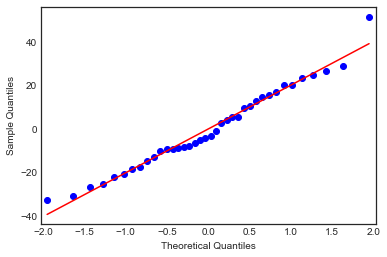

In [11]:
sm.qqplot(iqsize_model.resid, line='r');

__given the small sample size there's little to suggest violation of the normality assumption__

 scatterplot with the residuals, $e_i$, on the vertical axis and the only predictor excluded from the model, Weight, on the horizontal axis:

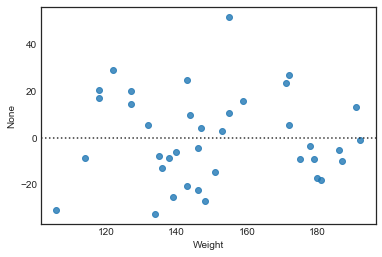

In [12]:
sns.residplot(x = iqsize.Weight, y = iqsize_model.resid)

__Since there is no strong linear or simple nonlinear trend in this plot, there is nothing to suggest that Weight might be usefully added to the model.__

### 7.5 Test for Error Normality

To complement the graphical methods for just assessing residual normality,w e cna perfomr a hypothesis test in which:

- H_0: the errors  follow a normal distribution
- H_A: the  errors do not follow a normal  distribution

__Failing to reject H0 means that the errors follow a normal distribution__

In [13]:
stats.anderson(iqsize_model.resid)

AndersonResult(statistic=0.2620601705640482, critical_values=array([0.529, 0.603, 0.723, 0.844, 1.004]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

## PRACTICE PROBLEMS: Sequential Sums of Squares

TODO: https://newonlinecourses.science.psu.edu/stat501/node/296/

## Underground air quality

#### What are the breathing habits of baby birds that live in underground burrows?

![](https://newonlinecourses.science.psu.edu/stat501/sites/onlinecourses.science.psu.edu.stat501/files/08multiple/bank_swallow/index.png)

__Some researchers (Colby, et al, 1987) wanted to find out if nestling bank swallows, which live in underground burrows, also alter how they breathe.__

In [107]:
birds = pd.read_table("https://newonlinecourses.science.psu.edu/stat501/sites/onlinecourses.science.psu.edu.stat501/files/data/babybirds/index.txt")
birds.head()

,Vent,O2,CO2
0,-49,19,0.0
1,0,19,0.0
2,-98,19,0.0
3,148,19,0.0
4,49,19,0.0


Here is a scatter plot matrix of the resulting data behind the research

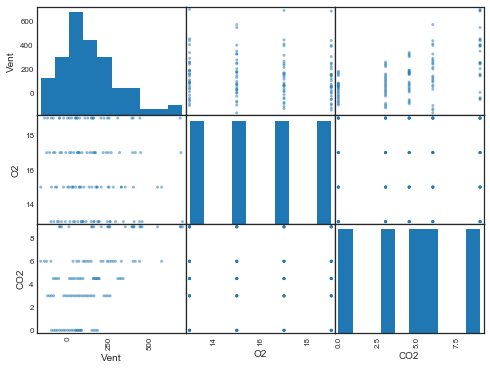

In [108]:
pd.plotting.scatter_matrix(birds, figsize=(8,6))
plt.show()

#### Analysis 
- There doesn't appear to be a substantial relationship between minute ventilation (Vent) and percentage of oxygen (O2).
- The relationship between minute ventilation (Vent) and percentage of carbon dioxide (CO2) appears to be curved and with increasing error variance.
- The plot between percentage of oxygen (O2) and percentage of carbon dioxide (CO2) is the classical appearance of a scatter plot for the experimental conditions

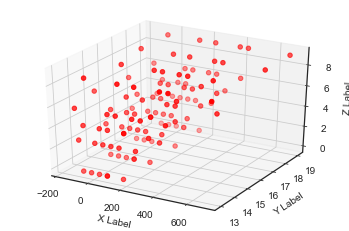

In [110]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(birds.Vent, birds.O2, birds.CO2, c='r', marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

### Regression Modeling
Here is a __"first order"__ model with __two quantitative predictors__ we could use to summarize the data:

$$y_i=(\beta_0+\beta_1x_{i1}+\beta_2x_{i2})+\epsilon_i$$

__First Order__ refers to a model in which the highest power on all of the predictor terms is one. 

Here is an examlpe of a __"second order"__ model:

$$y=\beta_0+\beta_1x+\beta_2x^2+\epsilon$$

In [8]:
birds_model = smf.ols(formula="Vent ~ O2 + CO2", data = birds).fit()
print(birds_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Vent   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     21.44
Date:                Wed, 06 Feb 2019   Prob (F-statistic):           1.17e-08
Time:                        18:27:35   Log-Likelihood:                -775.79
No. Observations:                 120   AIC:                             1558.
Df Residuals:                     117   BIC:                             1566.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     85.9008    106.006      0.810      0.4

### Analysis
- `R-Squared = 0.268` which indicates only 26.8% of the variation in `minute ventilation` is reduced by taking into account the percentages of oxygem and carbon dioxide. 


> Is oxygen related to minute ventilation, after taking into account carbon dioxide? (Conduct a hypothesis test for testing whether the O2 slope parameter is 0.)

with `CO2` held constanct, `o2` does not relate to minute ventilation as a result of our testing `O2` pvalue is not less than our significance level of 0.05.

> Is carbon dioxide related to minute ventilation, after taking into account oxygen? (Conduct a hypothesis test for testing whether the CO2 slope parameter is 0.)

Yes. There is significant evidence to concludde CO2 is related to minute ventilation after taking into account oxygen. 


>What is the mean minute ventilation of all nestling bank swallows whose breathing air is comprised of 15% oxygen and 5% carbon dioxide? (Calculate and interpret a confidence interval for the mean response.)

In [9]:
# Statsmodel - prediction for new observation
print("Mean vent predicted: ",birds_model.predict(pd.DataFrame({'O2':[15], 'CO2':[0.05]})))

Mean vent predicted:  0    7.505972
dtype: float64


## Pastery Sweetness Data

![](https://newonlinecourses.science.psu.edu/stat501/sites/onlinecourses.science.psu.edu.stat501/files/examples/pastry/index.png)

 In a designed experiment, the eight possible combinations of four moisture levels and two sweetness levels are studied.

In [10]:
pastry = pd.read_table("./data/pastry.txt")
pastry.head()

,Rating,Moisture,Sweetness
0,64,4,2
1,73,4,4
2,61,4,2
3,76,4,4
4,72,6,2


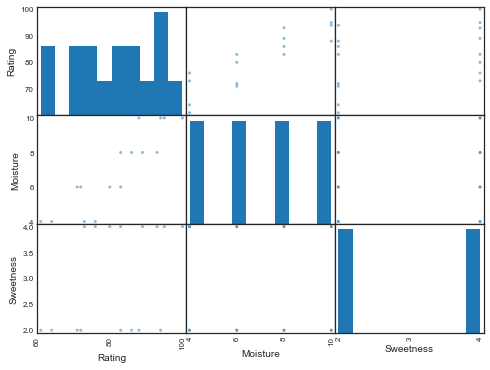

In [11]:
pd.plotting.scatter_matrix(pastry, figsize=(8,6))
plt.show()

__A plot of moisture versus sweetness (the two x-variables) is as follows:__

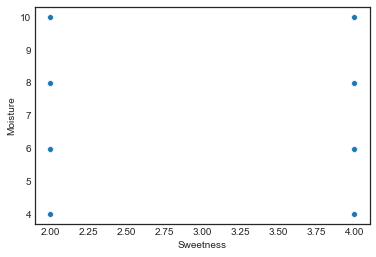

In [12]:
sns.scatterplot(y='Moisture', x='Sweetness', data = pastry)

From the graph above we can see the points appear like a rectangular grid so the __correlation between the two variables is 0__.

Below is a _line plot_ that shows __how the two x-variables affect the `pastry rating`__

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


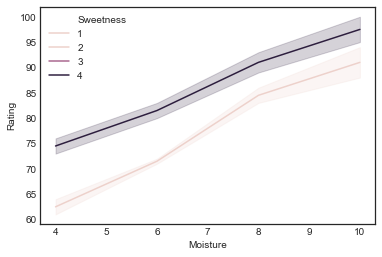

In [13]:
sns.lineplot(y='Rating', x='Moisture', hue='Sweetness', data = pastry)

We can see there __is a linear relationship between `rating` and `moisture` and there is also a `sweetness differenec`__


### Regression Model

In [14]:
pastry_lm = smf.ols(formula='Rating ~ Moisture + Sweetness', data = pastry).fit()
print(pastry_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     129.1
Date:                Wed, 06 Feb 2019   Prob (F-statistic):           2.66e-09
Time:                        18:27:36   Log-Likelihood:                -36.894
No. Observations:                  16   AIC:                             79.79
Df Residuals:                      13   BIC:                             82.11
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     37.6500      2.996     12.566      0.0

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


#### Interpretation
- R-squared = 0.952 indicating the model (the two x-variables) explaines  95.2% of the observed variaiton in `rating`.

- p-value given for the two x-variables tell us that `rating` is significantly related to each other. 

---
# Lession 6: MLR Model Evaluation

## 6.1 - Three Types of Hypotheses

## Heart attacks in rabbits

![](https://newonlinecourses.science.psu.edu/stat501/sites/onlinecourses.science.psu.edu.stat501/files/08multiple/rabbit/index.png)

Some researchers (Hale, et al, 1997) hypothesized that cooling the heart would be effective in reducing the size of the heart attack even if it takes place after the blood flow becomes restricted.

The researchers established three experimental groups:
- Rabbits whose hearts were cooled to 6º C within 5 minutes of the blocked artery ("early cooling")
- Rabbits whose hearts were cooled to 6º C within 25 minutes of the blocked artery ("late cooling")
- Rabbits whose hearts were not cooled at all ("no cooling")

#### Does the mean size of the infarcted area differ among the three treatment groups — no cooling, early cooling, and late cooling — when controlling for the size of the region at risk for infarction?

A regression model that the researchers might use in answering their research question is:

$$y_i=(\beta_0+\beta_1x_{i1}+\beta_2x_{i2}+\beta_3x_{i3})+\epsilon_i$$


In [15]:
bunny = pd.read_table("https://newonlinecourses.science.psu.edu/stat501/sites/onlinecourses.science.psu.edu.stat501/files/data/coolhearts/index.txt", encoding='utf-16')
bunny.head()

,Inf,Area,Group,X2,X3
0,0.119,0.34,3,0,0
1,0.190,0.64,3,0,0
2,0.395,0.76,3,0,0
3,0.469,0.83,3,0,0
4,0.130,0.73,3,0,0


__A plot of the darta adorned with the estimated regression equation look like the following:__

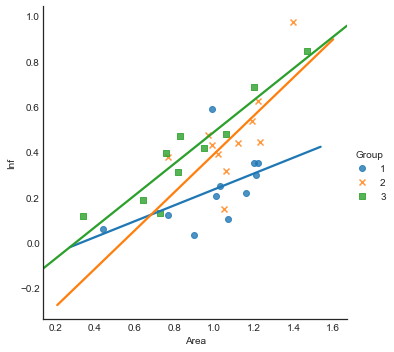

In [16]:
sns.lmplot(x ='Area', y = 'Inf', data = bunny, hue = 'Group', 
           ci = None, markers=["o", "x", 's'])

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


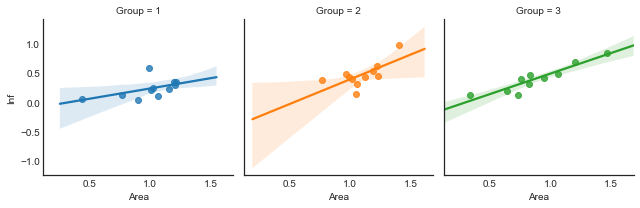

In [17]:
sns.lmplot(x ='Area', y = 'Inf', data = bunny, col = 'Group',  hue = 'Group',
           col_wrap = 3, height=3)

#### Interpretation
- The size of the `area` in risk increases, the size of the `infracted` area also tend to increase. 

## PRACTICE PROBLEM: Hypothesis Tests for the Slope Parameters

The problems in this section are designed to review the hypothesis tests for the slope parameters, as well as to give you some practice on models with a three-group qualitative variable.

![](https://www.synvital.nl/upload_directory/images/producten/synvital-planten/sugarbeetsconcept-Standard.jpg)

A group of researchers were interested in studying the effects of three different growth regulators (treat, denoted 1, 2, and 3) on the yield of sugar beets (y = yield, in pounds). herefore, the researchers also measured and recorded the available nitrogen (x1 = nit, in pounds/acre) in each plot. __They are interested in comparing the mean yields of sugar beets subjected to the different growth regulators after taking into account the available nitrogen__


In [18]:
sugar = pd.read_table("https://newonlinecourses.science.psu.edu/stat501/sites/onlinecourses.science.psu.edu.stat501/files/data/sugarbeets_new/index.txt", encoding='utf-16')
sugar.head()

,Yield,Nit,Treat
0,210,100,1
1,150,50,1
2,225,105,1
3,180,75,1
4,190,80,1


>Create a scatter plot with y = yield on the y-axis and x = nit on the x-axis — in doing so, use the qualitative ("grouping") variable treat to denote whether each plot received the first, second or third growth regulator. Does the plot suggest that it is reasonable to formulate a multiple regression model that would place three parallel lines through the data? 

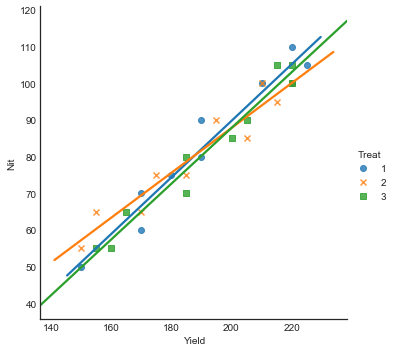

In [19]:
sns.lmplot(x ='Yield', y = 'Nit', data = sugar, hue = 'Treat', 
           ci = None, markers=["o", "x", 's'])

Yes. from the scatter plot above, it seems appropriate to continue with MLR as the `Treat` `Yield` appear linear relationship with `Nit`

> Because the qualitative variable treat distinguishes between the three treatment groups (1, 2, and 3), we need to create two indicator variables, x2 and x3, say, in order to fit a linear regression model to these data.

In [20]:
sugar.loc[sugar.Treat == 1, 'x2'] = 1
sugar.loc[sugar.Treat == 1, 'x3'] = 0
sugar.loc[sugar.Treat == 2, 'x2'] = 0
sugar.loc[sugar.Treat == 2, 'x3'] = 1
sugar.loc[sugar.Treat == 3, 'x2'] = 0
sugar.loc[sugar.Treat == 3, 'x3'] = 0

sugar.head()

,Yield,Nit,Treat,x2,x3
0,210,100,1,1.0,0.0
1,150,50,1,1.0,0.0
2,225,105,1,1.0,0.0
3,180,75,1,1.0,0.0
4,190,80,1,1.0,0.0


Above we reated indicator variable for each treatment group but we can only use two, for treatment groups 1 and 2 in this case (treatment group 3 is the reference level in this case).

>if we assume the trend in the data can be summarized by this regression model: 
yi = β0 + β1x1 + β2x2 + β3x3 + εi

Anser the following questions

In [21]:
# create a reression model
sugar_model = smf.ols(formula='Yield ~ Nit + x2 + x3',data = sugar).fit()
print(sugar_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Yield   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     128.9
Date:                Wed, 06 Feb 2019   Prob (F-statistic):           9.95e-16
Time:                        18:27:39   Log-Likelihood:                -96.293
No. Observations:                  30   AIC:                             200.6
Df Residuals:                      26   BIC:                             206.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     84.9882      5.778     14.708      0.0

>what is the mean response function for plots receiving treatment 3?

The mean response function for recieving treatement 3 is: __84.98 + 1.3088 (Nit)__

> for plots receiving treatment 1? 

The mean response function for reieving treat 1: __84.9882 + 1.3088 (Nit) + -2.426 (1) = 82.56 + 1.3088 (Nit)__

> for plots receiving treatment 2? 

The mean response function for recieving treat 2: __84.98 + 1.30 (Nit)  -2.345 (1) = 82.64 + 1.30088 (Nit)__

>  Are the three regression lines that arise from our formulated model parallel?

__Yes, the three estimated regression lines are parallel since they have the same slope, 1.3088.__ 

> What does the parameter β2 quantify?

β2 _(regression parameter for `x2`)_ __represents the difference between the estimated intercept for `treatment 1` and the etimated intercept for the reference `treatment 3`__


> What does the parameter β3 quantify?

β3 _(regression parameter for `x3`)_ __represents the difference between the estimated intercept for `treatement 2` and the estimated intercept for reference `treatement 3`__. 

### Testing Hyptoeheses

Below we have listed 3 sets of research hypthesis we are wishing to test. we can test each HT by using the __general linaer F-statistic__:

$$F^*=\left(\frac{SSE(R)-SSE(F)}{df_R-df_F}\right) \div \left(\frac{SSE(F)}{df_F}\right)$$


### Research Hypothesis #1  - Testing whether all of the slope parameters are 0

__"Is the regression model containing at least one predictor useful in predicting the size of sugar beet yield?"__

- H0 : β1 = β2 = β3 = 0
- HA : At least one βj ≠ 0 (for j = 1, 2, 3)

In [22]:
anova_ = sm.stats.anova_lm(sugar_model, typ=1)
print(anova_)

            df        sum_sq       mean_sq           F        PR(>F)
Nit        1.0  16001.556361  16001.556361  385.934995  4.029741e-17
x2         1.0     10.431413     10.431413    0.251591  6.201780e-01
x3         1.0     27.505642     27.505642    0.663397  4.227610e-01
Residual  26.0   1078.006584     41.461792         NaN           NaN


__Since the p-value for this f-statistic is reported as >0.001, we reject Ho in favor in Ha, and conclude that at least one of the slope parameters is not zero__ _(i.e., the regression model containing at least one predictor is useful in predicting the size of sugar beet yield)_

### Research Hypothesis #2 - Test for whether one slope parameter is 0

__Is sugar beet yield significantly linearly related to the available nitrogen?"__ _(The answer to this question will educate the researchers on whether they need to worry about differences in nitrogen in future experiments.)_

- H0 : β1 = 0
- HA : β1 ≠ 0

> Fit the linear regression model with y = yield and (in order) x2 and x3 and x1 = nit as predictors

In [23]:
print(sugar_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Yield   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     128.9
Date:                Wed, 06 Feb 2019   Prob (F-statistic):           9.95e-16
Time:                        18:27:39   Log-Likelihood:                -96.293
No. Observations:                  30   AIC:                             200.6
Df Residuals:                      26   BIC:                             206.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     84.9882      5.778     14.708      0.0

Above is the regression model output and we can see that the `Nit` t-statistici is 19.604 with a p-value >0.000, __therefore we can reject Ho in favor for Ha indicating that the slope parameter for `x1 = nit` is not zero__ _(e.g., suger beet yield is significatly linearly related to the available nitrogen (controlling treatment)_

### Research Hypothesis #2 - Test for wheter a subset of the slope paramters are 0

__Is there a significant difference in the mean yields of sugar beets subjected to the different growth regulators after taking into account the available nitrogen?__

- H0 : β2 = β3 = 0
- HA : At least one βj ≠ 0 (for j = 2, 3)

Above in the regression model output, we can see that x2 and x3 pva; ie = 1-0.36 = 0.636, so we __fail to reject Ho in favor of Ha, and ocnlcude tat we cannot rull out B2 = B3 = 0__ _i.e., there is no significant difference in the meran yields of sugar beets subjected to the different growth regulators after taking into account the varailable nitrogen_. 

### Sequential 

In [24]:
acl = pd.read_table("https://newonlinecourses.science.psu.edu/stat501/sites/onlinecourses.science.psu.edu.stat501/files/data/allentest/index.txt", encoding='utf-16')
acl.head()

,Subj,ACL,Vocab,Abstract,SDMT
0,1,6.0,28,36,70
1,2,5.4,34,32,49
2,3,4.7,19,8,28
3,4,4.8,32,28,47
4,5,4.9,22,4,29


__regress y = ACL on x1 = Vocab__

In [25]:
# create a reression model
acl_model = smf.ols(formula='ACL ~ Vocab', data = acl).fit()
anova_ = sm.stats.anova_lm(acl_model, typ=1)
print(anova_)

            df     sum_sq   mean_sq         F   PR(>F)
Vocab      1.0   2.690602  2.690602  4.466675  0.03829
Residual  67.0  40.358963  0.602373       NaN      NaN


__regress y = ACL on x1 = Vocab and x3 = SDMT__

In [26]:
# create a reression model
acl_model = smf.ols(formula='ACL ~ Vocab + SDMT', data = acl).fit()
anova_ = sm.stats.anova_lm(acl_model, typ=1)
print(anova_)

            df     sum_sq   mean_sq          F    PR(>F)
Vocab      1.0   2.690602  2.690602   5.678604  0.020060
SDMT       1.0   9.087234  9.087234  19.178903  0.000044
Residual  66.0  31.271729  0.473814        NaN       NaN


In [27]:
2.69-(2.69+9.08)

-9.08

- 2.6906 is the reduction in the error sum of squares — or the increase in the regression sum of squares — when you add x1 = Vocab to a model containing no predictors. That is, 2.6906 is just the regression sum of squares SSR(x1).
- 9.0872 is the reduction in the error sum of squares — or the increase in the regression sum of squares — when you add x3 = SDMT to a model already containing x1 = Vocab. That is, 9.0872 is the sequential sum of squares SSR(x3 | x

#### Order Maters when perfomring sequential sums of squares 

__regressing y = ACL on x3 = SDMT__

In [28]:
# create a reression model
acl_model = smf.ols(formula='ACL ~ SDMT', data = acl).fit()
anova_ = sm.stats.anova_lm(acl_model, typ=1)
print(anova_)

            df     sum_sq    mean_sq          F    PR(>F)
SDMT       1.0  11.679891  11.679891  24.946154  0.000004
Residual  67.0  31.369674   0.468204        NaN       NaN


__regressing y = ACL on x3 = SDMT and x1 = Vocab__

In [29]:
# create a reression model
acl_model = smf.ols(formula='ACL ~ SDMT + Vocab', data = acl).fit()
anova_ = sm.stats.anova_lm(acl_model, typ=1)
print(anova_)

            df     sum_sq    mean_sq          F    PR(>F)
SDMT       1.0  11.679891  11.679891  24.650790  0.000005
Vocab      1.0   0.097945   0.097945   0.206716  0.650845
Residual  66.0  31.271729   0.473814        NaN       NaN


- SSR(x3) = 11.6799. That is, the error sum of squares is reduced — or the regression sum of squares is increased — by 11.6799 when you add x3 = SDMT to a model containing no predictors. 
- SSR(x1 | x3) = 0.0979. That is, the error sum of squares is reduced — or the regression sum of squares is increased — by (only!) 0.0979 when you add x1 = Vocab to a model already containing x3 = SDMT.

In [30]:
# create a reression model
acl_model = smf.ols(formula='ACL ~ SDMT + Vocab + Abstract', data = acl).fit()
anova_ = sm.stats.anova_lm(acl_model, typ=1)
print(anova_)

            df     sum_sq    mean_sq          F    PR(>F)
SDMT       1.0  11.679891  11.679891  24.690245  0.000005
Vocab      1.0   0.097945   0.097945   0.207047  0.650608
Abstract   1.0   0.523030   0.523030   1.105638  0.296926
Residual  65.0  30.748699   0.473057        NaN       NaN


__Alternatively, we can calculate the sequential sum of squares `SSR(x1, x2| x3)` by definition of the reduction in the error sum of squares"__

In [31]:
print("SSR(x1, x2| x3): ", (anova_.sum_sq.Vocab + anova_.sum_sq.Abstract))

SSR(x1, x2| x3):  0.6209748601406189


---
# Lesson 8: Categorical Predictors


## Example Borth weight and Smoking

![](https://newonlinecourses.science.psu.edu/stat501/sites/onlinecourses.science.psu.edu.stat501/files/08multiple/infant_baby/index.png)

In [9]:
birth = pd.read_table("https://newonlinecourses.science.psu.edu/stat501/sites/onlinecourses.science.psu.edu.stat501/files/data/birthsmokers/index.txt")
birth.head()

,Wgt,Gest,Smoke
0,2940,38,yes
1,3130,38,no
2,2420,36,yes
3,2450,34,no
4,2760,39,yes


__Scatter plot matrix:__

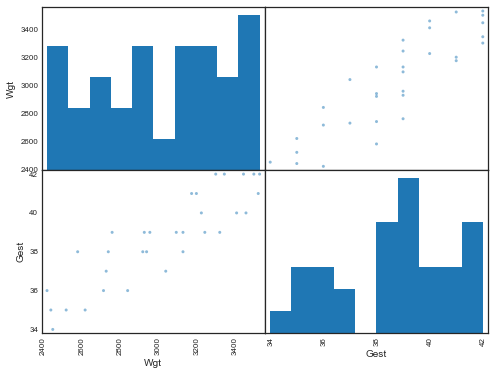

In [10]:
pd.plotting.scatter_matrix(birth, figsize=(8,6))
plt.show()

#### Interpretation:
The above scatter plot mattrix suggest __there is a positive linear relationship between length gestation and birth weights__ _that is as the length of gestation increases, the birth weight of babies tends to increase_.

>The important question remains — after taking into account length of gestation, is there a significant difference in the average birth weights of babies born to smoking and non-smoking mothers?

$$y_i=(\beta_0+\beta_1x_{i1}+\beta_2x_{i2})+\epsilon_i$$

__Below is the plot of the estimated regression function__

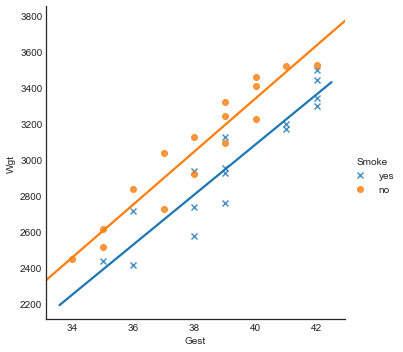

In [11]:
sns.lmplot(x ='Gest', y = 'Wgt', data = birth, hue = 'Smoke', 
           ci = None, markers=["x", "o"])

The `x` represent smokers while thie `o` (circles) represent the data on non spoking lines. The blue line represtns the estimated linear relationship between length of gestation and birth weight for smoking mother and the orange liner represits the estimated linear relationship for non-smokign mothers.

__At least in this sample of data, it appears as if the birth weights for non-smoking mothers is higher than that for smoking mothers, regardless of the length of gestation. A hypothesis test or confidence interval would allow us to see if this result extends to the larger population.__

In [12]:
# create a reression model
birth_model = smf.ols(formula='Wgt ~ Smoke + Gest',data = birth).fit()
print(birth_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    Wgt   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     125.4
Date:                Sat, 09 Feb 2019   Prob (F-statistic):           5.29e-15
Time:                        04:52:32   Log-Likelihood:                -195.82
No. Observations:                  32   AIC:                             397.6
Df Residuals:                      29   BIC:                             402.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -2389.5729    349.206     -6.843   

#### Estimated Regression Equations
- Estimated regression funciton is: `Wgt = -2390 + 143 Gest - 244.5 Smoke`
- non-smoking mothers (smoking = 0) is: `Weight = - 2390 + 143 Gest`
- smoking mothers (when smoking = 1) is: `Weight = - 2635 + 143 Gest`


#### Interprtation of OLS Results
- 89.6% of the varation of the birth weight of babies is explained by the length of gestation and the smoking status of the mother
- the p-value for the t-test appearing on the table of estimates suggest that the parameter for `Gest (P <0.001)` and `Smoking (P < 0.001)` are __signifincatly different from 0__. 

In [13]:
anova_ = sm.stats.anova_lm(birth_model, typ=1)
print(anova_)

            df        sum_sq       mean_sq           F        PR(>F)
Smoke      1.0  6.845000e+04  6.845000e+04    5.128403  3.118790e-02
Gest       1.0  3.280270e+06  3.280270e+06  245.763978  1.070123e-15
Residual  29.0  3.870698e+05  1.334724e+04         NaN           NaN


The ANOVA `F-test (P < 0.001)` suggsts that the model containing length of gestation and smoking status is more useful in predicting birth weight than not taking into account the two predictors. 

Therefore our response function would be:
$$\mu_Y=\beta_0+\beta_1x_{i1}+\beta_2x_{i2}$$

this yeilds __one regression function for non-smoking mothers (xi2 = 0):__
$$\mu_Y=\beta_0+\beta_1x_{i1}$$

and one __regresion for smoking mother (xi2 = 1):__
$$\mu_Y=(\beta_0+\beta_2)+\beta_1x_{i1}$$


__Note that the two formulated regression functions have the same slope (β1) but different intercepts (β0 and β0 + β2)__

### Example: On average, do smoking mothers have babies with lower birth weight?


__Is there a significant difference in mean birth weights for the two groups, after taking into account length of gestation?__

We can show that if the slope parameter β2 is 0, there is no difference in the means of the two groups — for any length of gestation:

- H0 : β2 = 0
- HA : β2 ≠ 0

In [14]:
print(birth_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    Wgt   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     125.4
Date:                Sat, 09 Feb 2019   Prob (F-statistic):           5.29e-15
Time:                        04:52:32   Log-Likelihood:                -195.82
No. Observations:                  32   AIC:                             397.6
Df Residuals:                      29   BIC:                             402.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -2389.5729    349.206     -6.843   

#### P-Value
We can see that the `Smoke (p < 0.001)` with a alpha = 0.05, we can __reject the null hypothesis in favor for the alternative hyptohesis HA : β2 ≠ 0, with sufficient evidence to conclude that there is a statisticla significant difference beteween the mean birth weight of all babies of smoking mothers and hte mena birht weight of babies of all non-smoking mothers, after taking into account length of gestation__


#### Confidence Interval
__We can be 95% confident that the mean birth weight of smoking mothers is between 158.7 and 330.4 grams less than the mean birth weight of non-smoking mothers, regardless of the length of gestation. It is up to the researchers to debate whether or not the difference is a meaningful difference.__

### Additive Effect

__When two predictors do not interact, we say that each predictor has an _"additive effect"_ on the repsone.__ A regression model containing additive effects if the response function cna be written as a sum of functions of the predictor variables. 

$$\mu_y=f_1(x_1)+f_2(x_2)+ ... + f_{p-1}(x_{p-1})$$

__Plot of the estimated regquesion equation__
`Weight = -2390 + 143 Gest - 245 Smoking`

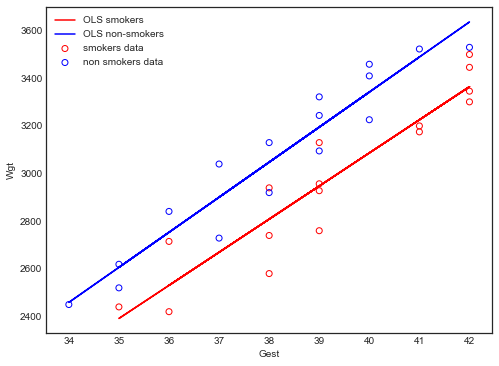

In [24]:
# https://nbviewer.jupyter.org/github/mscaudill/IntroStatLearn/blob/master/notebooks/Ch3_Linear_Regression/Lab_Linear_Regression.ipynb
# create a figure to plot our data and OLS estimate
fig, ax = plt.subplots(figsize=(8,6))

smoke_1 = birth[birth.Smoke =='yes']
smoke_2 = birth[birth.Smoke =='no']

ax.scatter(smoke_1.Gest.values, smoke_1.Wgt.values, facecolors='none',
          edgecolors='r', label='smokers data')
ax.set_xlabel('Gest')
ax.set_ylabel('Wgt')

# call scipy linregress returning fit coefficients and simple statistics
beta1, beta0, r_value, p_value, stderr = stats.linregress(smoke_1.Gest.values, smoke_1.Wgt.values)

# add the estimation to the data plot
ax.plot(smoke_1.Gest.values, beta0 + beta1 * smoke_1.Gest.values,
       color = 'r', label = 'OLS smokers')
ax.legend(loc='best')

##### NON SMOKERS

ax.scatter(smoke_2.Gest.values, smoke_2.Wgt.values, facecolors='none',
          edgecolors='b', label='non smokers data')

# call scipy linregress returning fit coefficients and simple statistics
beta1, beta0, r_value, p_value, stderr = stats.linregress(smoke_2.Gest.values, smoke_2.Wgt.values)

# add the estimation to the data plot
ax.plot(smoke_2.Gest.values, beta0 + beta1 * smoke_2.Gest.values,
       color = 'b', label = 'OLS non-smokers')
ax.legend(loc='best')


#### Does the effect of the gestation length on mean birth weight depend on whether or not the mother is a smoker? 
__NO__ from the regression scatterplot above, the mean birth weight is predicted to increase by 143 grams. __This lack of interaction between the two predictors is exhibted by the parallelness of the two lines__.


#### Does the effect of smoking on mean birth weight depend on the length of gestation?
__No__ for a fixed length of gestation, the mean birth weight of babies born to smoking mother is predicted to be 245 grams lower than the mean birth weight of babies to be born to non-smokign mothers. This lack of interaction between the two predictors is exhbited by the parallenlenss of the two lines.

## Depression Example

In [25]:
depression = pd.read_table("https://newonlinecourses.science.psu.edu/stat501/sites/onlinecourses.science.psu.edu.stat501/files/data/depression/index.txt")
depression.head()

,y,age,x2,x3,TRT
0,56,21,1,0,A
1,41,23,0,1,B
2,40,30,0,1,B
3,28,19,0,0,C
4,55,28,1,0,A


__Below is a scatter plot of the data with treatment effectiveness on the y-axis and age on the x-axis:__

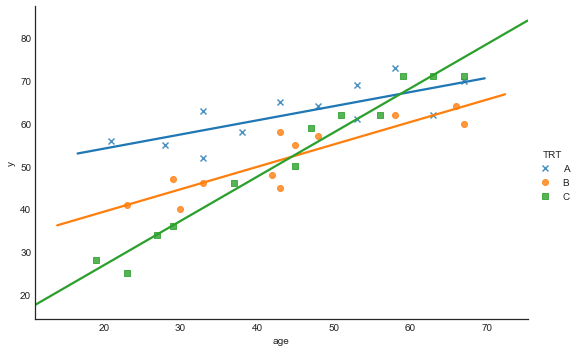

In [35]:
sns.lmplot(x ='age', y = 'y', data = depression, hue = 'TRT', 
           ci = None, markers=["x", "o", "s"], height = 5, aspect = 1.5)

Comparing this scatterplot to what we saw in the previous `birth` example a key difference is that this scatterplot treaments __do not have the same slopes__. That is for the `birth` regression functions they had the same slope and therefore the regression lines were parallel. Now we can see that the __3 best fitting lines indicate slopes are not the same, therefore we need ot include _interaction terms_ in our fomulated regression model.__

$$y_i=\beta_0+\beta_1x_{i1}+\beta_2x_{i2}+\beta_3x_{i3}+\beta_{12}x_{i1}x_{i2}+\beta_{13}x_{i1}x_{i3}+\epsilon_i$$

where:
- yi = measure of the effectiveness of the treatment for individual i
- xi1 = age (in years) of individual i
- xi2 = 1 if individual i received treatment A and 0, if not 
- xi3 = 1 if individual i received treatment B and 0, if not

below is the estime of the model

In [42]:
# create a reression model
depression_model = smf.ols(formula='y ~ age + x2 + x3 + age*x2 + age*x3',data = depression).fit()
print(depression_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     64.04
Date:                Sat, 09 Feb 2019   Prob (F-statistic):           4.26e-15
Time:                        05:47:03   Log-Likelihood:                -97.024
No. Observations:                  36   AIC:                             206.0
Df Residuals:                      30   BIC:                             215.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.2114      3.350      1.854      0.0

we report the folloing regression equation:
`y = 6.21 + 1.033 age + 41.30 x2 + 22.71 x3 - 0.703 agex2 - 0.51 agex3`

__In short, the effect of age on the predicted treatment effectiveness depends on the treatment given. That is, age appears to interact with treatment in its impact on treatment effectiveness. The interaction is exhibited graphically by the "nonparallelness" (is that a word?) of the lines.__

We get the folloing __estimated regression funcitnos__
$$\hat{y}=47.5+0.33x_1$$
__this means for patients in this study recieving treatment A, the effectiveness of the treatment si predicted to increase 0.33 units for every additional year in age__


$$\hat{y}=28.9+0.52x_1$$
__this mean for patients in this sudy recieving treatment B, the effectiveness of the tratement is predicted to be 0.52 units for every additional year in age__

$$\hat{y}=6.21+1.03x_1$$
__for patients in this sudy receiving treatment C, the effectivenss of the treatment is predicted to increase 1.03 units for every additional year in age__


### Drawing Conclusions

In order to draw conclusion from not of this particular sample of depressed individulas, but of the entire population we first should __evaluate the model__

Below is the __residual vs fitted plot:__

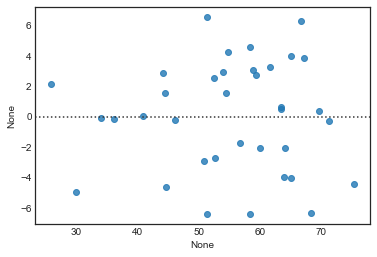

In [44]:
sns.residplot(x = depression_model.fittedvalues, y = depression_model.resid)

the appears to be constant spread and with no outliers and randomness indicaitng assumption is met. 

__Below is the Normal Probability plot__

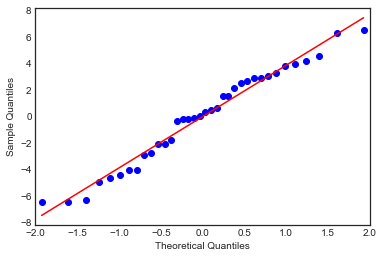

In [43]:
sm.qqplot(depression_model.resid, line='r');

The linear linear trend indicated the normal distribution.

#### First research question. For every age, is there a difference in the mean effectiveness for the three treatments?

 - H0 : β2 = β3 = β12 = β13 = 0 against the alternative 
 - HA : at least one of these slope parameters is not 0.

In [46]:
anova_ = sm.stats.anova_lm(depression_model, typ=1)
print(anova_)

            df       sum_sq      mean_sq           F        PR(>F)
age        1.0  3424.431786  3424.431786  222.294615  2.058902e-15
x2         1.0   803.804498   803.804498   52.178412  4.856763e-08
x3         1.0     1.189004     1.189004    0.077183  7.830570e-01
age:x2     1.0   375.002499   375.002499   24.343027  2.807848e-05
age:x3     1.0   328.424475   328.424475   21.319447  6.849515e-05
Residual  30.0   462.147738    15.404925         NaN           NaN


that the probability of observing an F-statistic —with 4 numerator and 30 denominator degrees of freedom —less than our observed test statistic 24.49 is > 0.999. Therefore, our P-value is < 0.001. We can reject our null hypothesis. There is sufficient evidence at the α = 0.05 level to conclude that there is a significant difference in the mean effectiveness for the three treatments.


#### Second research question. Does the effect of age on the treatment's effectiveness depend on treatment?

- H0 : β12 = β13 = 0 
- HA : at least one of the interaction parameters is not 0.

that the probability of observing an F-statistic — with 2 numerator and 30 denominator degrees of freedom — less than our observed test statistic 22.84 is > 0.999. Therefore, our P-value is < 0.001. We can reject our null hypothesis. There is sufficient evidence at the α = 0.05 level to conclude that the effect of age on the treatment's effectiveness depends on the treatment.

# (8.6) PRACTICE PROBLEMS: A model with an interaction term

https://newonlinecourses.science.psu.edu/stat501/node/307/

# 8.7 PRACTICE PROBLEMS: Piecewise Linear Regression

__Piecewise linear regression__ basic ideas is that if the data follow different linear trends over different regions of the data then we should model the regression function in __"pieces"__.

> An electronics company periodically imports shipments of a certain large part used as a component in several of its products. The size of the shipment varies depending upon production schedules. For handling and distribution to assemby plants, shipments of size 250 thousand parts or less are sent to warehouse A; larger shipments are sent to warehouse B since this warehouse has specialized equipment that provides greater economies of scale for large shipments.

In [37]:
ship = pd.read_table("./data/ship.txt", sep=" ")
ship = ship[['y', 'x1']]
ship

,y,x1
0,11.95,225
1,14.13,350
2,8.93,150
3,10.98,200
4,10.03,175
5,10.13,180
6,13.75,325
7,13.30,290
8,15.00,400
9,7.97,125


__Scatter plot__

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


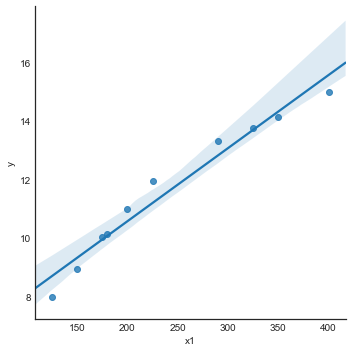

In [40]:
sns.lmplot(x ='x1', y = 'y', data = ship)

While the plot deems resonable, there appears to be some curvautre for a linear regression.


Not surprisingly, we'll use a dummy variable and an interaction term to help define the piecewise linear regression model. Specifically, the model we'll fit is: 
yi = β0 + β1xi1 + β2 (xi1 - 250) xi2 + εi

where xi1 is the size of the shipment and xi2 = 0 if xi1 < 250 and xi2 = 1 if xi1 > 250. We could also write this model as:
yi = β0 + β1xi1 + β2x*i2 + εi
where x*i2 = (xi1 - 250) xi2.

In [67]:
ship.loc[ship.x1 <= 250, 'x2'] = 0
ship.loc[ship.x1 > 250, 'x2'] = 1

In [61]:
ship['x2'] = ship.x1 - 250

In [70]:
ship_model = smf.ols(formula='y ~ x1 + x1*x2',data = ship).fit()
print(ship_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                     6377.
Date:                Mon, 11 Feb 2019   Prob (F-statistic):           6.74e-11
Time:                        05:19:42   Log-Likelihood:                 18.011
No. Observations:                  10   AIC:                            -28.02
Df Residuals:                       6   BIC:                            -26.81
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9629      0.116     25.445      0.0

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


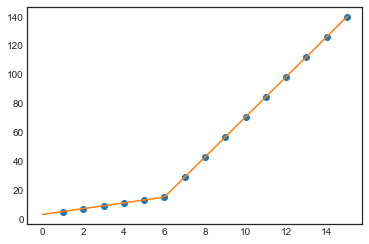

In [72]:
#https://datascience.stackexchange.com/questions/8457/python-library-for-segmented-regression-a-k-a-piecewise-regression
from scipy import optimize
import matplotlib.pyplot as plt
import numpy as np

x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10 ,11, 12, 13, 14, 15], dtype=float)
y = np.array([5, 7, 9, 11, 13, 15, 28.92, 42.81, 56.7, 70.59, 84.47, 98.36, 112.25, 126.14, 140.03])

def piecewise_linear(x, x0, y0, k1, k2):
    return np.piecewise(x, [x < x0, x >= x0], [lambda x:k1*x + y0-k1*x0, lambda x:k2*x + y0-k2*x0])

p , e = optimize.curve_fit(piecewise_linear, x, y)
xd = np.linspace(0, 15, 100)
plt.plot(x, y, "o")
plt.plot(xd, piecewise_linear(xd, *p))

## Summary Example from Categorical Predictors

![](https://camo.githubusercontent.com/1721729c963e9c92788c73c8e1d38661cf377eed/68747470733a2f2f7777772e7265616c657374617465636f6e73756c74696e672e636f6d2f77702d636f6e74656e742f75706c6f6164732f323031372f31322f424d49466561747572652d57686572652d4172652d57652d496e2d486f7573696e672d4379636c652e706e67)

Consider the real estate dataset: realestate.txt. Let us define
- Y = sale price of home
- X1 = square footage of home
- X2 = whether home has air conditioning or not.

In [63]:
real = pd.read_table("https://newonlinecourses.science.psu.edu/stat501/sites/onlinecourses.science.psu.edu.stat501/files/data/realestate/index.txt")
real.head()

,SalePrice,SqFeet,Beds,Baths,Air,Garage,Pool,Year,Quality,Style,Lot,Highway
0,360.0,3.032,4,4,1,2,0,1972,2,1,22.221,0
1,340.0,2.058,4,2,1,2,0,1976,2,1,22.912,0
2,250.0,1.780,4,3,1,2,0,1980,2,1,21.345,0
3,205.5,1.638,4,2,1,2,0,1963,2,1,17.342,0
4,275.5,2.196,4,3,1,2,0,1968,2,7,21.786,0


In [65]:
real_model = smf.ols(formula='SalePrice ~ SqFeet + Air + SqFeet*Air',data = real).fit()
print(real_model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     381.2
Date:                Mon, 11 Feb 2019   Prob (F-statistic):          1.50e-130
Time:                        05:18:47   Log-Likelihood:                -3000.4
No. Observations:                 521   AIC:                             6009.
Df Residuals:                     517   BIC:                             6026.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.2175     30.085     -0.107      0.9

note: We would calculate a new variable by multiplying the square feet size and air conditioning variables. That variable would then be used as a predictor variable, along with the original x-variables.

The regression equation is:
Average SalePrice = −3.218 + 104.902 × SqrFeet − 78.868 × Air + 55.888 × SqrFeet × Air.

_Suppose that a home has air conditioning. That means the variable Air = 1, so we’ll substitute Air = 1 in both places that Air occurs in the estimated model._ This gives us
Average SalePrice = −3.218 + 104.902 × SqrFeet − 78.868(1) + 55.888 × SqrFeet × 1
= −82.086 + 160.790 × SqrFeet.

_Suppose that a home does not have air conditioning. That means the variable Air = 0, so we’ll substitute Air = 0 in both places that Air occurs in the estimated model._ This gives us
Average SalePrice = −3.218 + 104.902 × SqrFeet − 78.868(0) + 55.888 × SqrFeet × 0
= −3.218 + 104.902 × SqrFeet.

__The figure below is a graph of the relationship between sale price and square foot area for homes with air conditioning and homes without air conditioning.__

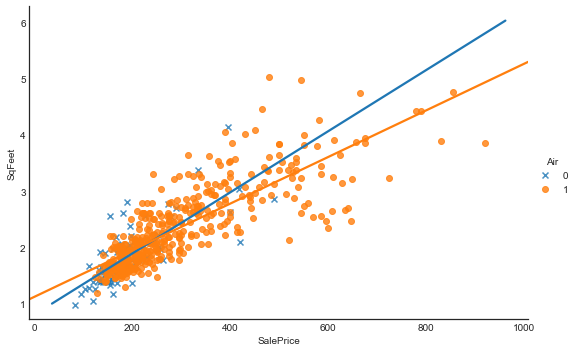

In [71]:
sns.lmplot(x ='SalePrice', y = 'SqFeet', data = real, hue = 'Air', 
           ci = None, markers=["x", "o"], height = 5, aspect = 1.5)

__The difference between the two lines increases as the square foot area increases. This means that air conditioning versus no air conditioning difference in average sale price increases as the size of the home increases.__

__There is an increasing variance problem apparent in the above plot, which is even more obvious in the following residual plot:__

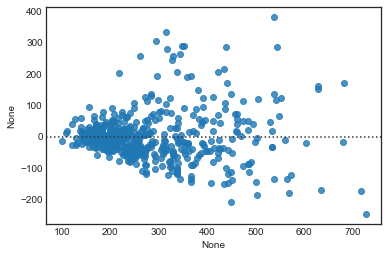

In [73]:
sns.residplot(x = real_model.fittedvalues, y = real_model.resid);

---
# Lesson 9: Data Transformation

In [82]:
word = pd.read_table("https://newonlinecourses.science.psu.edu/stat501/sites/onlinecourses.science.psu.edu.stat501/files/data/wordrecall/index.txt")
word.head()

,time,prop
0,1,0.84
1,5,0.71
2,15,0.61
3,30,0.56
4,60,0.54


The resulting fitted line plot suggests that the proportion of recalled items (y) is not linearly related to time (x):

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


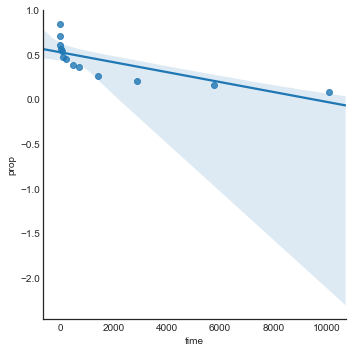

In [84]:
sns.lmplot(x ='time', y = 'prop', data = word)

The residuals vs. fits plot also suggests that the relationship is not linear:

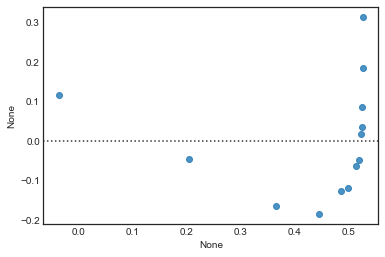

In [85]:
word_model = smf.ols(formula='prop ~ time',data = word).fit()
sns.residplot(x = word_model.fittedvalues, y = word_model.resid);

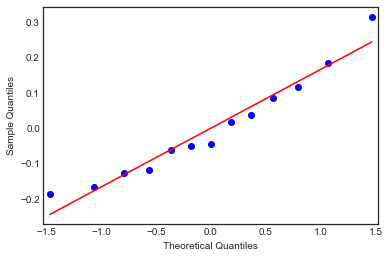

In [86]:
sm.qqplot(word_model.resid, line='r');

In [88]:
stats.shapiro(word_model.resid)

(0.9475452899932861, 0.561602771282196)

The Shapiro P-value for this example is large, which suggests that we fail to reject the null hypothesis of normal error terms. There is not enough evidence to conclude that the errors terms are not normal.

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


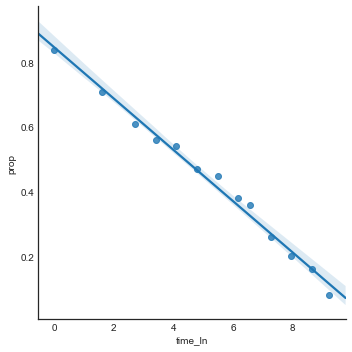

In [100]:
word['time_ln'] = np.log(word.time)
sns.lmplot(x ='time_ln', y = 'prop', data = word);

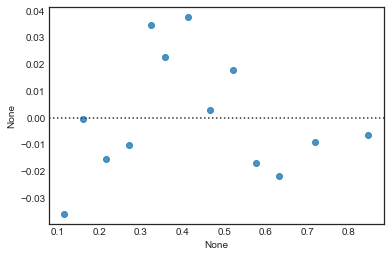

In [101]:
word_model = smf.ols(formula='prop ~ time_ln',data = word).fit()
sns.residplot(x = word_model.fittedvalues, y = word_model.resid);

The residuals vs fits plot shows significant improvements based on the log tansformed data. 

>__Research Question #1: What is the nature of the association between time since memorized and the effectiveness of recall?__

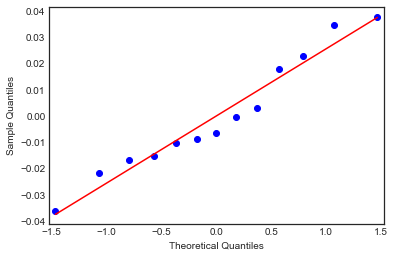

In [102]:
sm.qqplot(word_model.resid, line='r');

__the proportion of correctlu recalled words (y) is negatigvely linearly related to the natual log of the time (x)__


>__Research Question #2: Is there an association between time since memorized and effectiveness of recall?__



In [103]:
print(word_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   prop   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     1076.
Date:                Mon, 11 Feb 2019   Prob (F-statistic):           2.53e-12
Time:                        06:02:27   Log-Likelihood:                 31.462
No. Observations:                  13   AIC:                            -58.92
Df Residuals:                      11   BIC:                            -57.79
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8464      0.014     59.628      0.0

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  "anyway, n=%i" % int(n))


there is a clear association as we tested H0: β1 = 0 on the t test. `p <0.001` indicating that __there is significant evidence at 0.05 level to concolude that there is linear association between the proportion of words recalled and the natural lg of time since memorized__

>__Research Question #3: What proportion of words can we expect a randomly selected person to recall after 1000 minutes?__

we will specify the value of the predictor values (time) in log. 

In [105]:
word_model.get_prediction(pd.DataFrame({'time_ln':[np.log(1000)]})).summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,0.299135,0.007653,0.282292,0.315979,0.244973,0.353298


__We can be 95% confident that, after 1000 mins, a randomly selected person will recall between 24.5% and 35.3% of the words__

>__Research Question #4: How much does the expected recall change if time increases ten-fold?__

We take the estimate of the slope parameter (b1 = -0.079227) and multiply it by ln(10): 
__b1 × ln(10) = -0.079227 × ln(10) = -0.182__

__We expect the percentage of recalled words to decrease (since the sign is negative) 18.2% for each ten-fold increase in the time since memorization took place.__

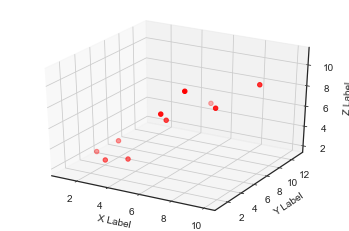

In [106]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x =[1,2,3,4,5,6,7,8,9,10]
y =[5,6,2,3,13,4,1,2,4,8]
z =[2,3,3,3,5,7,9,11,9,10]



ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

----
## Influence plots
Influence plots show the (externally) studentized residuals vs. the leverage of each observation as measured by the hat matrix.

Externally studentized residuals are residuals that are scaled by their standard deviation where

$$var(\hat{\epsilon}_i)=\hat{\sigma}^2_i(1-h_{ii})$$
 
with

$$\hat{\sigma}^2_i=\frac{1}{n - p - 1 \;\;}\sum_{j}^{n}\;\;\;\forall \;\;\; j \neq i$$
 
n  is the number of observations and  p  is the number of regressors.  hii  is the  i -th diagonal element of the hat matrix

H=X(X′X)−1X′
 
The influence of each point can be visualized by the criterion keyword argument. Options are Cook's distance and DFFITS, two measures of influence.

In [143]:
influence2 = pd.read_table("https://newonlinecourses.science.psu.edu/stat501/sites/onlinecourses.science.psu.edu.stat501/files/data/influence2/index.txt", encoding='utf-16')
inf_model = smf.ols(formula='y~x', data = influence2).fit()

#### Difference in Fits (DFFITS)
Another way of identifying influential data points

$$DFFITS_i=\frac{\hat{y}_i-\hat{y}_{(i)}}{\sqrt{MSE_{(i)}h_{ii}}}$$

__Regressing y on x and requesting the difference in fits & cooks'd:__

In [146]:
inf_model.get_influence().summary_frame()

,dfb_Intercept,dfb_x,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,-0.378957,0.323771,0.073076,-0.826351,0.176297,-0.382298,-0.819167,-0.378974
1,-0.104900,0.087702,0.005800,-0.249154,0.157454,-0.107708,-0.242905,-0.105007
2,-0.161273,0.128459,0.013794,-0.435445,0.127015,-0.166095,-0.425962,-0.162478
3,0.363423,-0.284773,0.067493,0.998187,0.119313,0.367405,0.998087,0.367368
4,-0.167569,0.117343,0.015960,-0.581904,0.086145,-0.178661,-0.571499,-0.175466
5,-0.153170,0.101944,0.013909,-0.574462,0.077744,-0.166789,-0.564060,-0.163769
6,0.094151,-0.055207,0.005954,0.413791,0.065028,0.109127,0.404582,0.106698
7,-0.079373,0.043741,0.004498,-0.371226,0.061276,-0.094845,-0.362643,-0.092652
8,0.018332,-0.003206,0.000494,0.139767,0.048147,0.031434,0.136110,0.030612
9,-0.039430,0.011769,0.001799,-0.262514,0.049628,-0.059989,-0.255977,-0.058495


The Cook's distance measure for the data point `(0.363914)` stands out a bit compared to the other Cook's distance measures. Still, the Cook's distance measure for the red data point is less than 0.5. Therefore, based on the Cook's distance measure, we would not classify the red data point as being influential.

Statsmodels includes a some builtin function for plotting residuals against leverage:

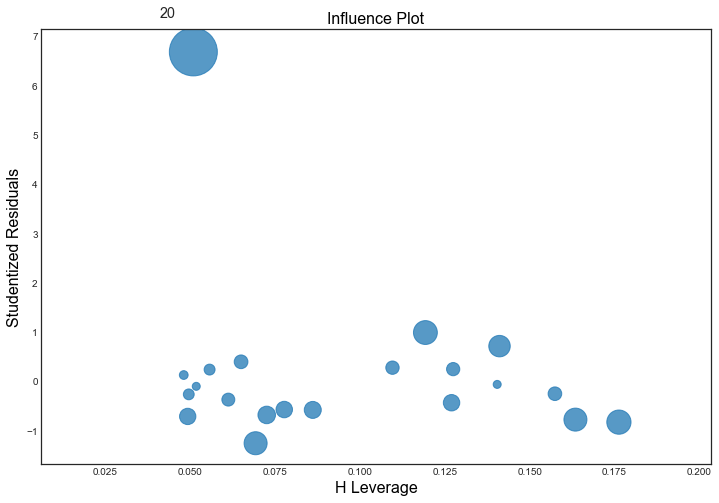

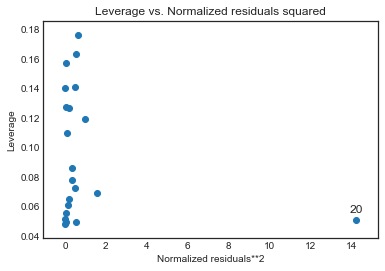

In [154]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(inf_model, ax=ax, criterion="DFFITS");
sm.graphics.plot_leverage_resid2(inf_model);

### Example - Influential Points



In [155]:
foot = pd.read_table("https://newonlinecourses.science.psu.edu/stat501/sites/onlinecourses.science.psu.edu.stat501/files/data/height_foot/index.txt")
foot.head()

,height,foot
0,66.5,27.0
1,73.5,29.0
2,70.0,25.5
3,71.0,27.9
4,73.0,27.0


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


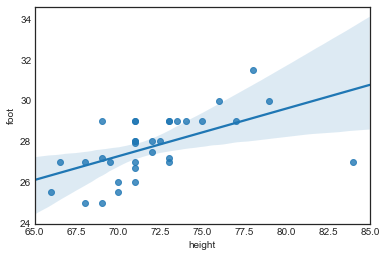

In [163]:
sns.regplot(x=foot.height, y=foot.foot)

the plot appears to to have an outlier that is __high leverage and high influence__

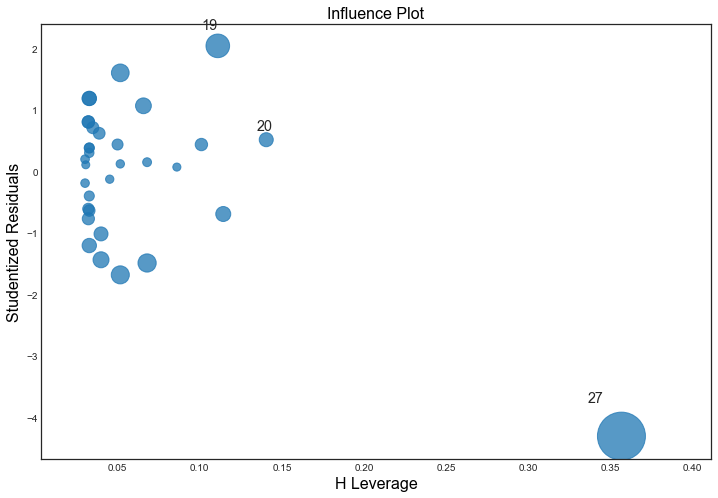

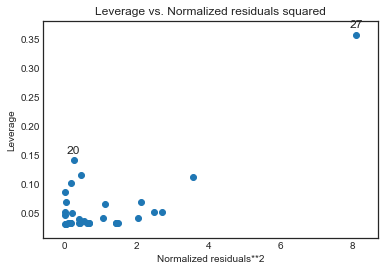

In [158]:
foot_model = smf.ols(formula='foot~height', data = foot).fit()
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(foot_model, ax=ax, criterion="DFFITS");
fig = sm.graphics.plot_leverage_resid2(foot_model);

It is clear that there is an outlier at 84,. __Note the outlier from earlier is the large value way to the right.The one large value of Cook’s Di is for the point that is the outlier in the original data set. The interpretation is that the inclusion (or deletion) of this point will have a large influence on the overall results__

----
# Lesson 12: Multicollinearity 